In [1]:
!pip install ultralytics > /dev/null

In [2]:
import os
import cv2
import shutil
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from ultralytics import YOLO

warnings.filterwarnings("ignore")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
TRAIN_IMAGES = Path('/kaggle/input/multi-instance-object-detection-challenge/Starter_Dataset/table_close_10/train/images')
TRAIN_LABELS = Path('/kaggle/input/multi-instance-object-detection-challenge/Starter_Dataset/table_close_10/train/labels')

TEST = Path('/kaggle/input/multi-instance-object-detection-challenge/Starter_Dataset/TestImages/images')

output_dir = Path("/kaggle/working/predictions/labels")
output_dir.mkdir(parents=True, exist_ok=True)

In [4]:
def visualize_random_masks(images_dir, masks_dir, counts=5):
    image_paths = list(images_dir.glob("*"))
    samples = np.random.choice(image_paths, counts, replace=False)

    plt.figure(figsize=(counts * 5, 8))

    for i, img_path in enumerate(samples, 1):
        mask_path = masks_dir / img_path.with_suffix(".txt").name

        image = cv2.imread(str(img_path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        h, w, _ = image.shape

        with open(mask_path, "r") as f:
            lines = f.readlines()
    
        for line in lines:
            parts = line.strip().split()

            try:
                class_id, x_center, y_center, box_w, box_h = map(float, parts)
            except:
                class_id, confidence, x_center, y_center, box_w, box_h = map(float, parts)

            x_center *= w
            y_center *= h
            box_w *= w
            box_h *= h
    
            x1 = int(x_center - box_w / 2)
            y1 = int(y_center - box_h / 2)
            x2 = int(x_center + box_w / 2)
            y2 = int(y_center + box_h / 2)

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 5)

        plt.subplot(1, counts, i)
        plt.imshow(image)
        plt.axis("off")
        plt.tight_layout()

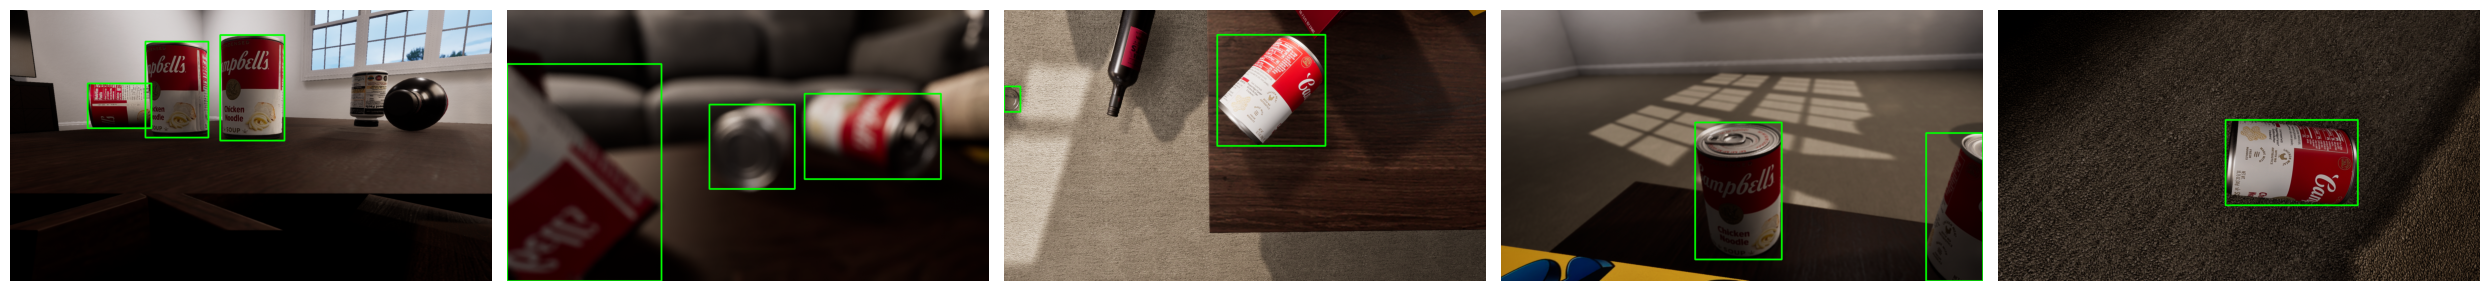

In [5]:
visualize_random_masks(TRAIN_IMAGES, TRAIN_LABELS)

In [6]:
model = YOLO("yolo11m.pt")
data_yaml = "/kaggle/input/multi-instance-object-detection-challenge/Starter_Dataset/yolo_params.yaml"

results = model.train(
    data=data_yaml,
    epochs=150,
    batch=4,
    imgsz=600,
    device=[0, 1],
    patience=10,
    lr0=0.0001,
    lrf=0.02,
    optimizer="Adam",
    weight_decay=0.003,
    cos_lr=True,
    dropout=0.5,
    label_smoothing=0.1,
    mosaic=0.5,
    mixup=0.15,
    copy_paste=0.1,
    fliplr=0.5,
    flipud=0.5,
    hsv_h=0.015,
    hsv_s=0.1,
    hsv_v=0.1,
    translate=0.2,
    scale=0.5,
    shear=0.2,
    perspective=0.0002,
    val=True,
    workers=8,
    seed=35
)

100%|██████████| 38.8M/38.8M [00:00<00:00, 249MB/s]


WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.158 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/input/multi-instance-object-detection-challenge/Starter_Dataset/yolo_params.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.5, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.1, hsv_v=0.1, imgsz=600, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.02, mask_ratio=4, max_det=300, mixup=0.15, mode=trai

100%|██████████| 755k/755k [00:00<00:00, 26.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.5MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]
train: Fast image access ✅ (ping: 0.2±0.2 ms, read: 296.6±449.4 MB/s, size: 3026.1 KB)


train: Scanning /kaggle/input/multi-instance-object-detection-challenge/Starter_Dataset/clutter/train/labels... 56 images, 1 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<00:00, 67.35it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/multi-instance-object-detection-challenge/Starter_Dataset/clutter/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


train: Scanning /kaggle/input/multi-instance-object-detection-challenge/Starter_Dataset/clutter/train/labels... 56 images, 1 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<00:00, 302.60it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 82.8±10.0 MB/s, size: 3526.6 KB)


val: Scanning /kaggle/input/multi-instance-object-detection-challenge/Starter_Dataset/clutter/val/labels... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<00:00, 49.87it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/multi-instance-object-detection-challenge/Starter_Dataset/clutter/val is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.0001, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.003), 112 bias(decay=0.0)
Image sizes 608 train, 608 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      1.38G     0.7008      2.615      1.013          6        608: 100%|██████████| 14/14 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]


                   all         14         28      0.707      0.862       0.81      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      1.51G     0.6657      1.961      0.928          3        608: 100%|██████████| 14/14 [00:02<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.69it/s]


                   all         14         28       0.67      0.929      0.797      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      1.62G     0.6585      1.313     0.9222          5        608: 100%|██████████| 14/14 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.23it/s]


                   all         14         28      0.818      0.821      0.838      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      1.72G     0.6058     0.9924     0.9213          6        608: 100%|██████████| 14/14 [00:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.68it/s]


                   all         14         28      0.824      0.838       0.87      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      1.85G     0.6623      1.004     0.9201          4        608: 100%|██████████| 14/14 [00:02<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.12it/s]


                   all         14         28      0.878      0.774      0.869      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      1.97G     0.5742     0.8393     0.9001          8        608: 100%|██████████| 14/14 [00:02<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.25it/s]


                   all         14         28      0.842      0.821      0.823      0.748

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.08G     0.6305     0.9435     0.9028          3        608: 100%|██████████| 14/14 [00:02<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.93it/s]


                   all         14         28      0.846      0.821      0.792      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150       2.2G     0.6595      0.869     0.9164          9        608: 100%|██████████| 14/14 [00:02<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.37it/s]


                   all         14         28      0.869      0.857      0.892      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.31G     0.7111     0.8313     0.9205          9        608: 100%|██████████| 14/14 [00:02<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 20.54it/s]


                   all         14         28       0.95      0.857      0.925      0.865

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.43G     0.6518     0.7705     0.9013         14        608: 100%|██████████| 14/14 [00:02<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.32it/s]


                   all         14         28      0.925      0.893       0.93      0.898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.54G     0.6653     0.7171     0.9601          3        608: 100%|██████████| 14/14 [00:02<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.31it/s]


                   all         14         28       0.88      0.929       0.93      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.66G     0.5984     0.7668     0.8767          9        608: 100%|██████████| 14/14 [00:02<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.78it/s]


                   all         14         28      0.865      0.917      0.931      0.887

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.77G     0.6479     0.7601     0.9274          4        608: 100%|██████████| 14/14 [00:02<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.21it/s]


                   all         14         28      0.866       0.92      0.921      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.89G     0.5783     0.6857     0.8766          3        608: 100%|██████████| 14/14 [00:02<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.85it/s]


                   all         14         28      0.866       0.92      0.921      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      3.01G     0.5892     0.7689      0.903          6        608: 100%|██████████| 14/14 [00:02<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.96it/s]


                   all         14         28      0.885      0.824      0.922      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      3.11G     0.5481     0.6442     0.9243          8        608: 100%|██████████| 14/14 [00:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.54it/s]


                   all         14         28      0.892      0.857      0.935      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      3.23G     0.5869     0.6727     0.9095         12        608: 100%|██████████| 14/14 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 22.68it/s]


                   all         14         28      0.881      0.893      0.937      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      3.34G     0.5396      0.565     0.9058          5        608: 100%|██████████| 14/14 [00:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.43it/s]


                   all         14         28        0.9      0.857      0.929      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      3.47G     0.5473     0.5564     0.8573         13        608: 100%|██████████| 14/14 [00:02<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.09it/s]


                   all         14         28      0.871      0.964      0.925      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      3.57G     0.5139     0.6231     0.8806          1        608: 100%|██████████| 14/14 [00:02<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.37it/s]


                   all         14         28      0.915      0.929      0.935      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150       3.7G     0.4879     0.4872     0.8082          4        608: 100%|██████████| 14/14 [00:02<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.49it/s]


                   all         14         28      0.927      0.929      0.947      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150       3.8G     0.6178     0.5617     0.9036         10        608: 100%|██████████| 14/14 [00:02<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.02it/s]


                   all         14         28      0.927      0.929      0.947      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      3.93G     0.4956     0.4629     0.8391          3        608: 100%|██████████| 14/14 [00:02<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.34it/s]


                   all         14         28      0.894      0.964      0.954      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      4.04G     0.4869     0.4859     0.8299          6        608: 100%|██████████| 14/14 [00:02<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.74it/s]


                   all         14         28      0.952      0.929      0.958      0.919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      4.15G     0.5619     0.5962     0.8491          8        608: 100%|██████████| 14/14 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.39it/s]


                   all         14         28       0.93      0.951      0.963       0.92

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      4.27G     0.5529     0.4879     0.8905         10        608: 100%|██████████| 14/14 [00:02<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.41it/s]


                   all         14         28      0.923      0.964      0.963      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      4.38G     0.6162     0.5047     0.8927          4        608: 100%|██████████| 14/14 [00:02<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.62it/s]


                   all         14         28       0.93      0.956      0.961      0.911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150       4.5G     0.4947       0.56     0.8524         10        608: 100%|██████████| 14/14 [00:02<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.46it/s]


                   all         14         28      0.931      0.964      0.949      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150       4.6G     0.4336     0.4589     0.8316          7        608: 100%|██████████| 14/14 [00:02<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 22.58it/s]


                   all         14         28      0.927      0.964       0.94      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      4.73G     0.6211     0.5297     0.9104          7        608: 100%|██████████| 14/14 [00:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.42it/s]


                   all         14         28      0.927      0.964       0.94      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      4.83G     0.5456     0.4923     0.8802          6        608: 100%|██████████| 14/14 [00:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.30it/s]


                   all         14         28      0.927      0.964      0.942      0.887

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      4.96G     0.5514     0.4914      0.907         17        608: 100%|██████████| 14/14 [00:02<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.14it/s]


                   all         14         28       0.96      0.964      0.952      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      5.06G     0.5778     0.4857     0.8766          7        608: 100%|██████████| 14/14 [00:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.12it/s]


                   all         14         28      0.961      0.964      0.963      0.913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      5.19G       0.53     0.4849     0.8612          6        608: 100%|██████████| 14/14 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.79it/s]


                   all         14         28      0.961      0.964      0.958      0.922

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150       5.3G     0.4951     0.4772     0.8244          7        608: 100%|██████████| 14/14 [00:02<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.15it/s]


                   all         14         28       0.96      0.964      0.968      0.921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      5.42G     0.4995     0.5169     0.8872          4        608: 100%|██████████| 14/14 [00:02<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.65it/s]


                   all         14         28       0.96      0.964      0.967      0.924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      5.53G     0.4989     0.4581     0.8562          5        608: 100%|██████████| 14/14 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.04it/s]


                   all         14         28      0.961      0.964      0.962      0.918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      5.63G     0.4942      0.434     0.8525         14        608: 100%|██████████| 14/14 [00:02<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.27it/s]


                   all         14         28      0.961      0.964      0.962      0.918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      5.76G     0.5128     0.4094      0.898         11        608: 100%|██████████| 14/14 [00:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.11it/s]


                   all         14         28      0.964      0.956       0.95      0.915

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      5.87G     0.4809     0.4077       0.86          5        608: 100%|██████████| 14/14 [00:02<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.04it/s]


                   all         14         28       0.95      0.929      0.948      0.911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150         6G     0.5437     0.4439     0.8605          2        608: 100%|██████████| 14/14 [00:02<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.10it/s]


                   all         14         28      0.951      0.929      0.945      0.912

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150       6.1G     0.5129     0.4692     0.8232         20        608: 100%|██████████| 14/14 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.12it/s]


                   all         14         28      0.916      0.929      0.921      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      6.22G     0.4937     0.3829     0.8269         10        608: 100%|██████████| 14/14 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.41it/s]


                   all         14         28       0.95      0.929      0.952      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      6.33G     0.5041     0.4513     0.8519         15        608: 100%|██████████| 14/14 [00:02<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 20.60it/s]


                   all         14         28      0.924      0.964      0.969      0.925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      6.45G     0.4689     0.3969     0.8434          9        608: 100%|██████████| 14/14 [00:02<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.18it/s]


                   all         14         28      0.961      0.964      0.978      0.948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      6.56G     0.4501     0.4191     0.8472         10        608: 100%|██████████| 14/14 [00:02<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.96it/s]


                   all         14         28      0.961      0.964      0.978      0.948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      6.69G     0.3983     0.3877     0.8252         12        608: 100%|██████████| 14/14 [00:02<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 20.95it/s]


                   all         14         28      0.962      0.964      0.983      0.943

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      6.79G     0.4602     0.4033      0.832          6        608: 100%|██████████| 14/14 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.97it/s]


                   all         14         28      0.963      0.964      0.984       0.94

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      6.92G     0.4971     0.3733     0.8653         13        608: 100%|██████████| 14/14 [00:02<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.99it/s]


                   all         14         28      0.964      0.963      0.981      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      7.02G     0.4244     0.3685     0.8086         14        608: 100%|██████████| 14/14 [00:02<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.42it/s]


                   all         14         28      0.964      0.964      0.981      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      7.15G     0.3743     0.3039     0.7573          5        608: 100%|██████████| 14/14 [00:02<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.54it/s]


                   all         14         28      0.962      0.964      0.979      0.927

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      7.25G     0.4541     0.3549     0.8621          6        608: 100%|██████████| 14/14 [00:02<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.47it/s]


                   all         14         28      0.961      0.964      0.978      0.929

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      7.36G     0.4536     0.3748     0.8403          6        608: 100%|██████████| 14/14 [00:02<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.08it/s]


                   all         14         28      0.961      0.964      0.973      0.924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      7.48G     0.5299     0.4035     0.9055         14        608: 100%|██████████| 14/14 [00:02<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.11it/s]


                   all         14         28      0.961      0.964      0.973      0.924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.03G     0.5586     0.4463     0.9036          8        608: 100%|██████████| 14/14 [00:02<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.04it/s]


                   all         14         28      0.961      0.964      0.972      0.921
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 45, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

55 epochs completed in 0.059 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.70it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         14         28      0.961      0.964      0.978      0.948
Speed: 0.9ms preprocess, 12.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


In [7]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
for img_path in TEST.glob("*"):
    results = model.predict(img_path, conf=0.05, device=0, verbose=False) # 0 - GPU or "cpu"
    output_txt = output_dir / f"{img_path.stem}.txt"

    with open(output_txt, "w") as f:
        found = False
        for result in results:
            img_height, img_width = result.orig_shape
            boxes = result.boxes.data

            if boxes is None or len(boxes) == 0:
                continue

            filtered_boxes = boxes[boxes[:, 4] >= 0.05]
            if len(filtered_boxes) == 0:
                continue

            found = True
            for box in filtered_boxes:
                x1, y1, x2, y2, confidence, cls_id = box.tolist()

                x_center = ((x1 + x2) / 2) / img_width
                y_center = ((y1 + y2) / 2) / img_height
                width = (x2 - x1) / img_width
                height = (y2 - y1) / img_height

                f.write(f"0 {confidence:.6f} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

        if not found:
            f.write("")

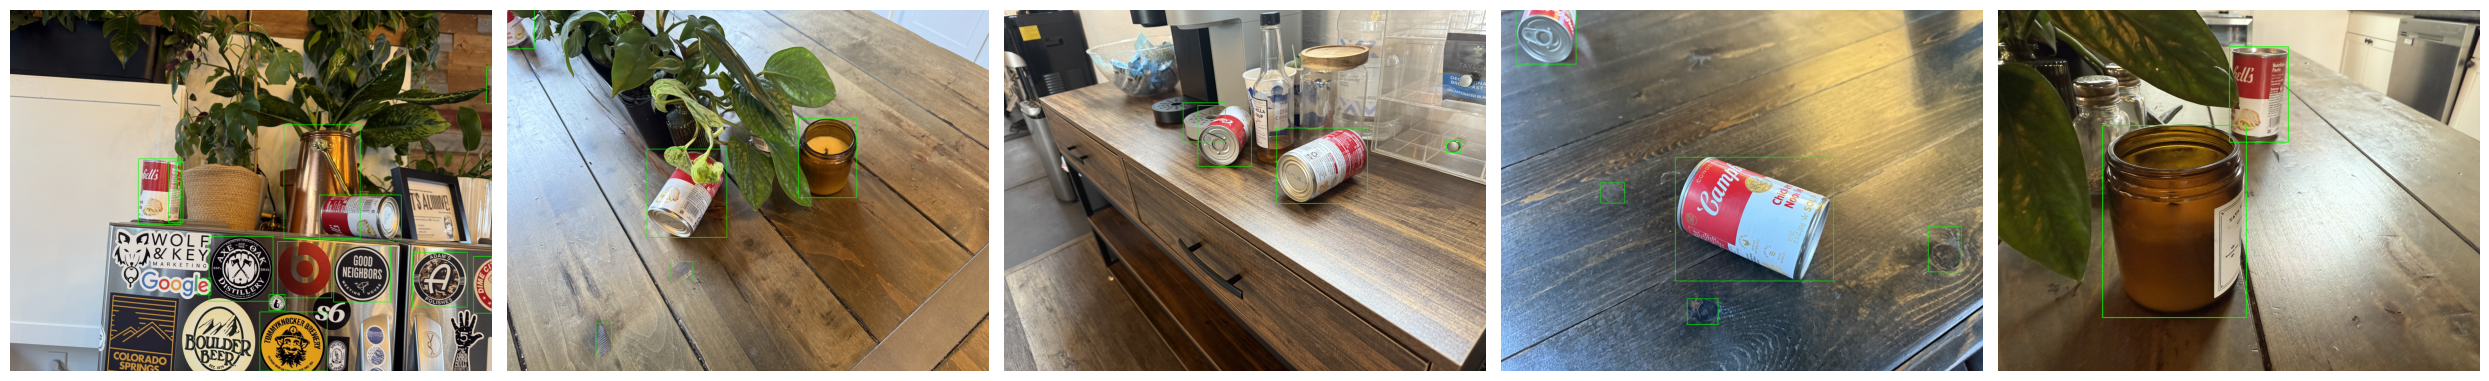

In [8]:
visualize_random_masks(TEST, output_dir)

In [9]:
rows = []
test_imgs = {p.stem for p in TEST.glob("*") if p.suffix.lower() in {".jpg", ".jpeg", ".png"}}
predicted = set()

for file in output_dir.glob("*.txt"):
    name = file.stem
    predicted.add(name)

    try:
        lines = [l.strip() for l in open(file) if len(l.strip().split()) == 6]
    except:
        lines = []

    rows.append({"image_id": name, "prediction_string": " ".join(lines) if lines else "no boxes"})

for name in test_imgs - predicted:
    rows.append({"image_id": name, "prediction_string": "no boxes"})

work_dir = '/kaggle/working'

for filename in os.listdir(work_dir):
    file_path = os.path.join(work_dir, filename)

    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print(f'Error file: {file_path}. Cause: {e}')

rows = pd.DataFrame(rows)
rows.to_csv("submission.csv", index=False)
rows

,image_id,prediction_string
0,IMG_9736,0 0.932849 0.260108 0.745074 0.215194 0.315881...
1,IMG_9602,0 0.931183 0.420779 0.409053 0.125552 0.231189...
2,IMG_9632,0 0.957911 0.379799 0.748731 0.375568 0.491289...
3,IMG_9680,0 0.833435 0.577842 0.092563 0.085221 0.185126...
4,IMG_9792,0 0.912841 0.583729 0.751376 0.082666 0.144595...
...,...,...
174,IMG_9758,0 0.746922 0.688100 0.599927 0.098096 0.290408...
175,IMG_9599,0 0.796827 0.392750 0.269432 0.069066 0.073953...
176,IMG_9735,0 0.988593 0.469473 0.656653 0.458938 0.518806...
177,IMG_9630,0 0.911405 0.437793 0.573655 0.075427 0.156924...
